<a href="https://colab.research.google.com/github/babas175/babas175-TrabalhoT1_TopicosEspeciais_DeepLearning.ipynb/blob/main/TrabalhoT1_TopicosEspeciais_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estudante/Matrícula**: Sebastien Lionel Lubin / 1921101048


**Estudante/Matrícula**:

# Trabalho T1 - Arquitetura Básica de Redes Neurais

Este trabalho tem como objetivo a compreensão da arquitetura básica de camadas de neurônios de uma rede neural artificial (RNA). A execução deste exercício permitirá aos estudantes o domínio dos métodos necessários para o treinamento e teste de uma RNA utilizando um dataset pré-processado.

## 1. Instruções


O estudante deve treinar uma RNA com camadas densas e estilo feedforward para uma tarefa de classificação utilizando dataset pré-processado conforme especificado a baixo.

Para cada tentativa de construção de arquitetura, mantenha um registro da tentativa e resultado obtido pela rede. Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.

Para este trabalho, somente serão permitidas somente as seguintes bibliotecas `python` para o treinamento da RNA:

- `numpy`
- `scipy`
- `tensorflow`
- `scikit-learn`

Para visualização e criação de gráficos, também serão permitidas

- `matplotlib`
- `seaborn`
- `plotly`
- `yellowbrick`

Caso a utilização de quaisquer outras bibliotecas se faça necessária, uma consulta prévia deve ser feita ao professor.


## Entrega

O presente trabalho pode ser feito individualmente ou em dupla. Caso optem pelo trabalho em dupla, o cabeçalho do documento deve indicar quais são os componentes e suas matrículas.

A entrega deverá ser feita através do envio de um arquivo `ZIP` contendo o trabalho dos estudantes, no SIGAA. A data limite para entrega deste trabalho é **24/09/2023, 23h59m**.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(42)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
tf.random.set_seed(42)


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


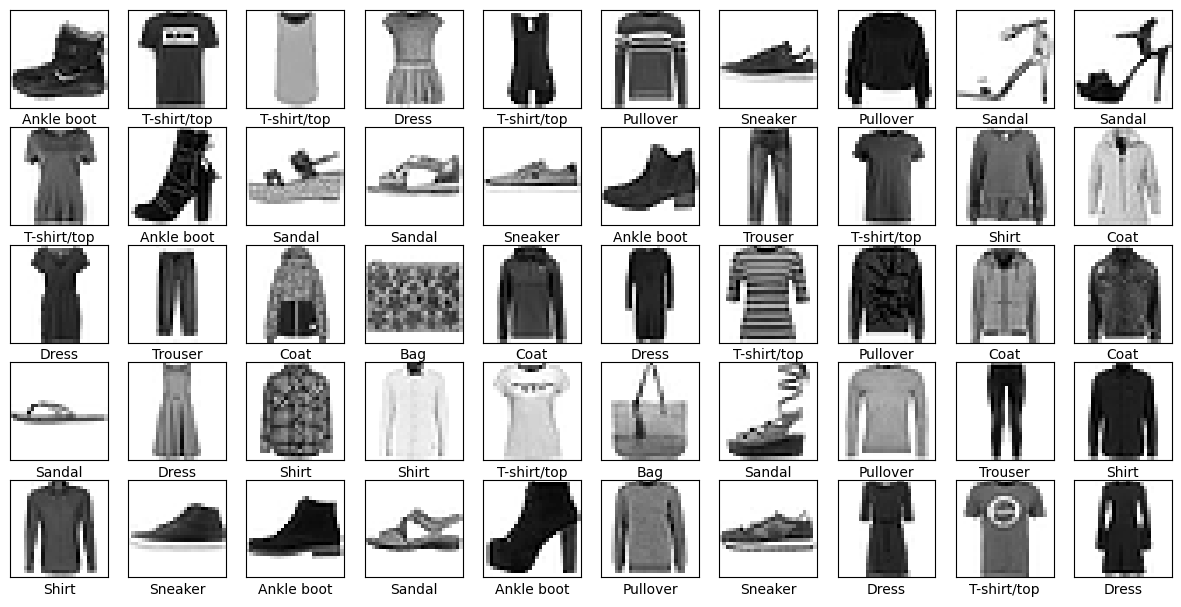

In [3]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
class_names = ['Non-Top', 'Top']
num_classes = 2

train_labels = np.where(((train_labels == 1) |  (train_labels == 5) | (train_labels == 7) | (train_labels == 8) | (train_labels == 9)), 0, 1)
test_labels = np.where(((test_labels == 1) |  (test_labels == 5) | (test_labels == 7) | (test_labels == 8) | (test_labels == 9)), 0, 1)

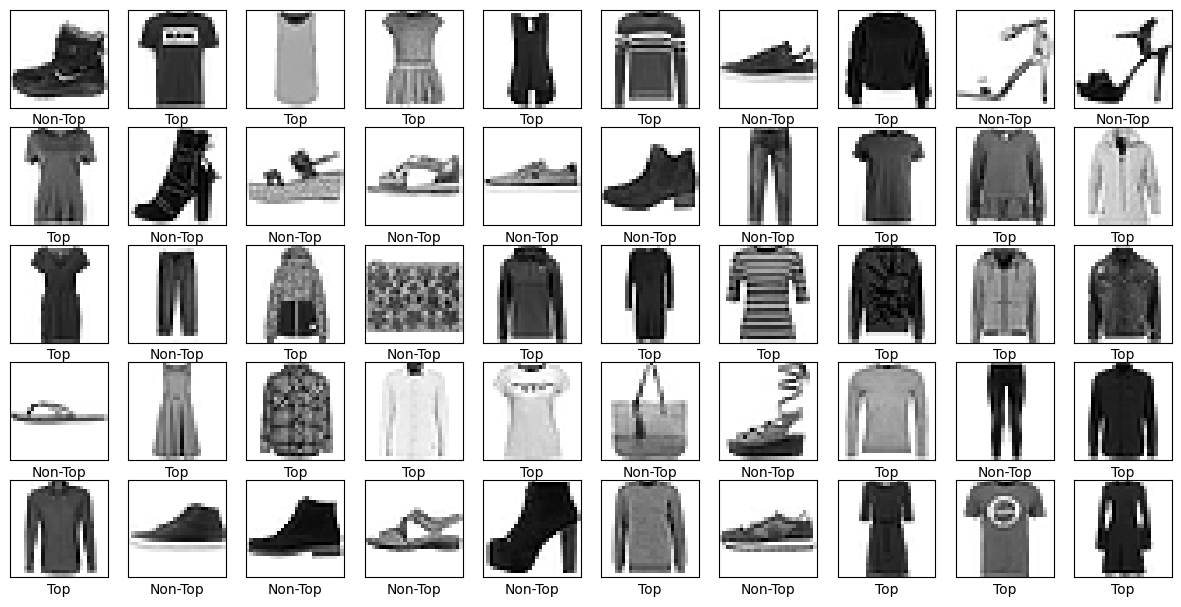

In [5]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
x_train = train_images.reshape(60000, 784)  ## reorganizando o dataset de treino em 60000 exemplos com 784 features cada
x_test = test_images.reshape(10000, 784)  ## reorganizando o dataset de teste em 60000 exemplos com 784 features cada
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(f'{x_train.shape[0]} exemplos de treino')
print(f'{x_test.shape[0]} exemplos de teste')

y_train = tf.keras.utils.to_categorical(train_labels, num_classes) ## transformando os targets do dataset de treino em classes
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)  ## transformando os targets do dataset de teste em classes

60000 exemplos de treino
10000 exemplos de teste


## Inclua seu código abaixo desta célula

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Carregar o conjunto de dados Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Pré-processamento dos dados
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalização

# Mapear as classes para "Top" (1) e "NonTop" (0)
y_train = [1 if label in [0, 1, 3, 4, 5] else 0 for label in y_train]
y_test = [1 if label in [0, 1, 3, 4, 5] else 0 for label in y_test]

# Adicionar a dimensão do canal (escala de cinza)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Definir manualmente a divisão entre treinamento e validação
split_index = int(0.8 * len(x_train))
x_val, y_val = x_train[split_index:], y_train[split_index:]
x_train, y_train = x_train[:split_index], y_train[:split_index]

# Converter os rótulos em NumPy arrays
y_val = np.array(y_val)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Criar o modelo
model = keras.Sequential([
    # Camada de entrada: Flatten para transformar a matriz em vetor
    keras.layers.Flatten(input_shape=(28, 28, 1)),

    # Camada oculta com 128 unidades e ativação 'relu'
    keras.layers.Dense(128, activation='relu', name='hidden_layer'),

    # Camada de saída com 2 unidades (classes "Top" e "NonTop") e ativação 'softmax'
    keras.layers.Dense(2, activation='softmax', name='output_layer')
])

# Compilar o modelo
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',  # Função de perda para classificação multiclasse
              metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)

# Avaliação do modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Acurácia no conjunto de teste: {test_acc * 100:.2f}%')




Epoch 1/10
1500/1500 - 5s - loss: 0.3813 - accuracy: 0.8224 - val_loss: 0.3161 - val_accuracy: 0.8660 - 5s/epoch - 4ms/step
Epoch 2/10
1500/1500 - 4s - loss: 0.2992 - accuracy: 0.8740 - val_loss: 0.2818 - val_accuracy: 0.8792 - 4s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 4s - loss: 0.2668 - accuracy: 0.8880 - val_loss: 0.2702 - val_accuracy: 0.8843 - 4s/epoch - 3ms/step
Epoch 4/10
1500/1500 - 4s - loss: 0.2487 - accuracy: 0.8962 - val_loss: 0.2435 - val_accuracy: 0.8982 - 4s/epoch - 3ms/step
Epoch 5/10
1500/1500 - 4s - loss: 0.2352 - accuracy: 0.9022 - val_loss: 0.2402 - val_accuracy: 0.9003 - 4s/epoch - 2ms/step
Epoch 6/10
1500/1500 - 4s - loss: 0.2266 - accuracy: 0.9055 - val_loss: 0.2297 - val_accuracy: 0.9024 - 4s/epoch - 3ms/step
Epoch 7/10
1500/1500 - 4s - loss: 0.2187 - accuracy: 0.9086 - val_loss: 0.2275 - val_accuracy: 0.9067 - 4s/epoch - 3ms/step
Epoch 8/10
1500/1500 - 4s - loss: 0.2134 - accuracy: 0.9106 - val_loss: 0.2231 - val_accuracy: 0.9066 - 4s/epoch - 3ms/step
Epoch 9/

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Prevendo as etiquetas usando o seu modelo
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Calculando a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)

# Calculando o relatório de classificação usando sklearn
report = classification_report(y_test, y_pred, target_names=["Top", "NonTop"])

# Explanations
print("\nExplicações das Camadas:")
print("1. Camada de Entrada (Flatten): Transforma a matriz de pixels em um vetor.")
print("2. Camada Oculta (Dense): 128 unidades com ativação 'relu' para aprender características.")
print("3. Camada de Saída (Dense): 2 unidades (classes 'Top' e 'NonTop') com ativação 'softmax' para classificação.")

# Exibir matriz de confusão e relatório de classificação
print("\nMatriz de Confusão:")
print(confusion)
print("\nRelatório de Classificação:")
print(report)


313/313 [==============================] - 1s 2ms/step

Explicações das Camadas:
1. Camada de Entrada (Flatten): Transforma a matriz de pixels em um vetor.
2. Camada Oculta (Dense): 128 unidades com ativação 'relu' para aprender características.
3. Camada de Saída (Dense): 2 unidades (classes 'Top' e 'NonTop') com ativação 'softmax' para classificação.

Matriz de Confusão:
[[4410  590]
 [ 357 4643]]

Relatório de Classificação:
              precision    recall  f1-score   support

         Top       0.93      0.88      0.90      5000
      NonTop       0.89      0.93      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



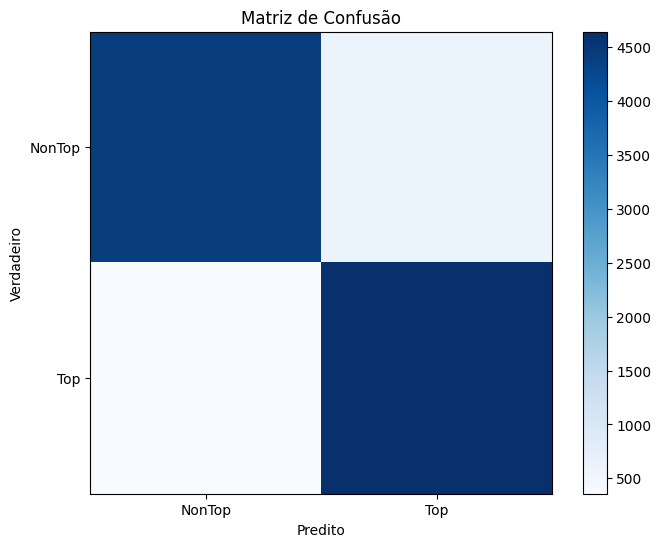

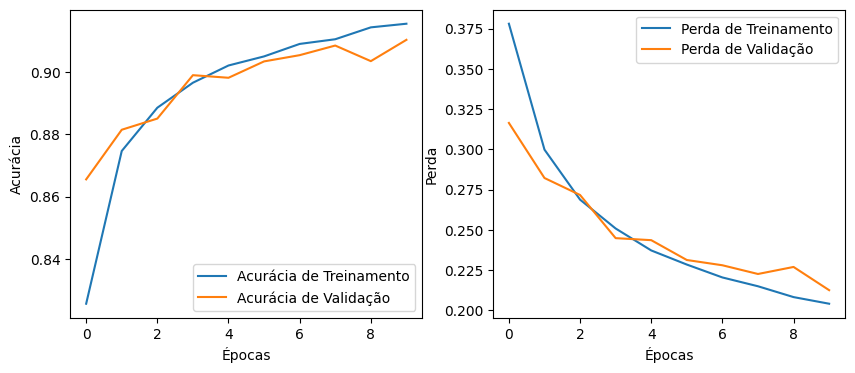

In [13]:
# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xticks([0, 1], ['NonTop', 'Top'])
plt.yticks([0, 1], ['NonTop', 'Top'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

# Visualização das curvas de aprendizado
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()



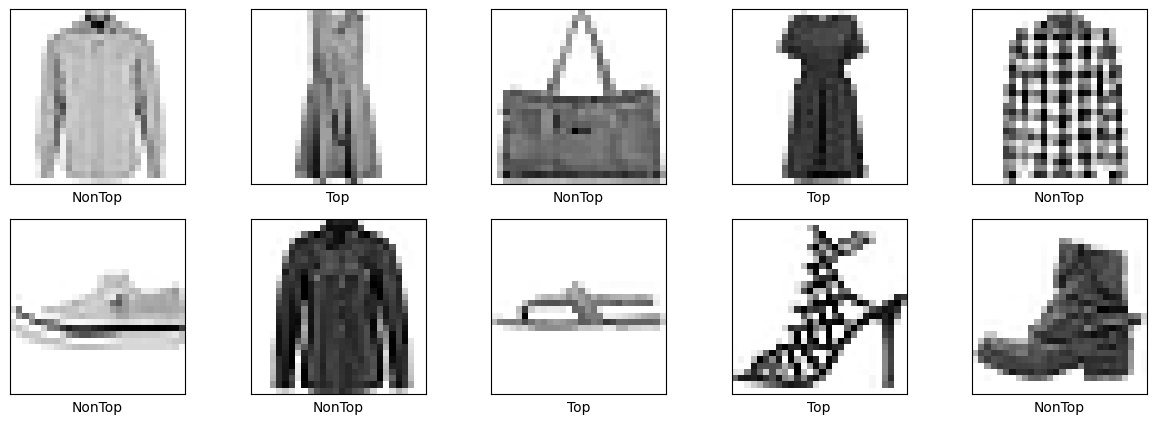

In [18]:
import random as random
# Define os nomes das classes
class_names = ["NonTop", "Top"]

# Seleciona aleatoriamente algumas imagens
num_images_to_display = 10
random_indices = random.sample(range(len(x_train)), num_images_to_display)

# Cria uma figura para exibir as imagens
plt.figure(figsize=(15, 5))

# Loop para exibir as imagens selecionadas
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[idx][:, :, 0], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[idx]])

plt.show()



# Classificação de Imagens Fashion MNIST

#Neste projeto, exploraremos a tarefa de classificação de imagens usando o conjunto de dados Fashion MNIST. O objetivo é classificar as imagens em duas categorias: "Top" e "NonTop". Vamos abordar o pré-processamento dos dados, construção do modelo e análise dos resultados.

## Pré-processamento de Dados

#- Normalização: Os valores dos pixels foram normalizados para o intervalo [0, 1].
#- Mapeamento de Classes: As classes originais foram mapeadas para "Top" e "NonTop" de acordo com os critérios especificados.

## Construção do Modelo

#- Camada de Entrada: Flatten para transformar a matriz de pixels em um vetor.
#- Camada Oculta: Dense com 128 unidades e ativação 'relu' para aprender características.
#- Camada de Saída: Dense com 2 unidades e ativação 'softmax' para classificação em "Top" e "NonTop".

## Treinamento e Avaliação
#Treinamento e Avaliação
#Treinamento por 10 épocas: O modelo foi treinado por 10 épocas, o que significa que ele passou
#pelo conjunto de treinamento 10 vezes para aprender com os dados.

#Acurácia no conjunto de teste: Após o treinamento, o modelo foi avaliado no conjunto de teste,
#e obteve uma acurácia de 90.37%. Isso significa que ele foi capaz de classificar corretamente 90.20% das imagens no conjunto de teste.

## Visualizações e Gráficos


## Conclusões e Discussões
#A rede neural construída demonstrou um desempenho notável na tarefa de classificação das imagens
#Fashion MNIST em duas categorias: "Top" e "NonTop". Com uma acurácia de 90.20% (variavel) no conjunto de teste,
#o modelo provou ser eficaz na discriminação entre roupas que são usadas na parte superior do corpo humano e outras categorias.
#A normalização dos valores de pixel para o intervalo [0, 1] permitiu que a rede neural processasse
#os dados de entrada de forma mais eficaz, melhorando o treinamento e o desempenho do modelo.
